<a href="https://colab.research.google.com/github/Meitiann/Preview/blob/master/INF2008_Lab_assignment01_2302073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF2008 Lab 01: Linear Regression
In this lab, we will implement the most classic machine learning model - Linear Regression. We will load a housing dataset from csv and fit a linear regression model to predict resale prices. Objectives are

1) load and operate CSV file (including training data) with [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) libriray

2) Instead of writing codes from the scratch, you can use [sklearn to do linear regression](https://scikit-learn.org/stable/modules/linear_model.html), you should be able to know how to use the following libriraries after this assignment

```
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
```

**[IMPORTANT] Lab Instruction**
1. Save a copy of the notebook to your Google Drive, rename it to INF2008_Lab_assignment01_`<Your_STUDENT_ID>`.ipynb
2. Fill in your `STUDENT_ID` in the notebook
3. Implement the lines with `#TODO` comments
4. **DO NOT** change any given code and comments

**[IMPORTANT] Submission Instruction**
1. After completing this notebook, please download the completed lab as a `.py` file (File > Download > Download .py)
<img src="https://drive.google.com/uc?id=1NAUZVnIbiJsiK-lrCKcPyYWQoDlkh6kw"
alt="altertext" width="400">
2. **Only submit the `.py` file to Dubmit the `.py` file to dropbox [W1-P*-assignments] by 19 Jan**





In [ ]:
import sys

STUDENT_ID = "1234567"  # Make sure you submit the correct student ID, e.g. STUDENT_ID="1234567"

if STUDENT_ID == "":
  print("Warning: STUDENT_ID is empty. Please enter your student ID before starting!")
  sys.exit()
else:
  print("Your student ID is %s, please ensure you typed the correct student ID"%STUDENT_ID)

## 1.1 Exploratory Analysis

Upload the csv data file into the Google colab file system.

Create a dataframe (dataset) by reading the CSV file: 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!gdown 1hAp8QvPOs7J6REhz8fftbBAXe07KPYO7
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

Downloading...
From: https://drive.google.com/uc?id=1hAp8QvPOs7J6REhz8fftbBAXe07KPYO7
To: /content/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv
100% 8.16M/8.16M [00:00<00:00, 34.9MB/s]


When you execute the `df` directly, it prints the first and last 5 rows, while omitting the rest.

In [ ]:
df

NameError: name 'df' is not defined

To view the first x rows and last x rows, use `df.head(x)` and `df.tail(x)` respectively.   

For instance, to view the first 5 rows, we use `df.head(5)`.

In [ ]:
# View the first 3 rows in df
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [ ]:
# View the last 3 rows in df
df.tail(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
82798,2020-10,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,66 years 02 months,670000.0
82799,2020-10,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,10 TO 12,164.0,Multi Generation,1987,66 years 02 months,750000.0
82800,2020-10,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,10 TO 12,171.0,Multi Generation,1987,66 years 02 months,780000.0


To view the column headers in the df, use `df.columns` property.

In [ ]:
# view the column headers of the df
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Check the data types of the columns, use the `dtypes` property.

In [ ]:
# view the data types of the df
df.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
remaining_lease,object


Check if there is any null or missing data in the dataframe.

`df.isnull()` turns the cell values into booleans;

`df.sum()` sum across column (when `axis=0`) or row (when `axis=1`)

In [ ]:
df.isnull().sum(axis=0)

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


Use the describe function to find out what are some of the basic statistical metrics in the numberical columns of the dataset.

In [ ]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,82801.000000,82801.000000,8.280100e+04
mean,97.661664,1994.199345,4.404444e+05
std,24.290822,12.891561,1.537263e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


This describes the dataset for all the columns. It is useful to find number of  unique values for individual columns.

In [ ]:
include = ['object', 'float', 'int']
df.describe(include=include)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,82801,82801,82801,82801,82801,82801,82801.000000,82801,82801.000000,82801,8.280100e+04
unique,46,26,7,2457,549,17,NaN,20,NaN,625,NaN
top,2018-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 09 months,NaN
freq,2539,6659,34288,280,1277,19273,NaN,27069,NaN,648,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.661664,NaN,1994.199345,NaN,4.404444e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.290822,NaN,12.891561,NaN,1.537263e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1984.000000,NaN,3.300000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,1994.000000,NaN,4.100000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2003.000000,NaN,5.150000e+05


Let's first check the correlation of the numerical columns, i.e. `floor_area_sqm` and `lease_commence_date` with the target (i.e. `resale_price`).

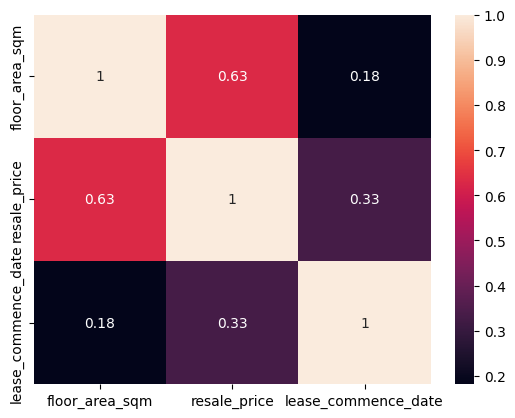

In [ ]:
# Show correlation heat map and matrix
df_corr = df.get(['floor_area_sqm', 'resale_price', 'lease_commence_date'])

corrmat = df_corr.corr()

sns.heatmap(corrmat,annot = True)
plt.show()

Observe that the correlation between `resale_price` and `floor_area_sqm` is high (0.63). This makes sense as the house price are highly influenced by the size of the house.

Also, the correlation with `lease_commence_date` is moderate (0.33), showing a substantial influence. This also aligns with our intuition as the age of the house should have a decent impact to the price.

---------------------------------------------------------------------------

Next, let's explore how to make use of a textual feature. Let's take a look at the unique values of the column `storey_range`. We find that all values are meaningful text (i.e. `string`s).

In [ ]:
storey_range_unique=df['storey_range'].unique()
storey_range_unique

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

Let's convert it to a numerical feature. We will use the `LabelEncoder` from `sklearn` to convert the text into numbers.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mapped = le.fit_transform(storey_range_unique)

mapping = dict(zip(mapped, storey_range_unique))
sorted_dict = dict(sorted(mapping.items()))

print(sorted_dict)


{0: '01 TO 03', 1: '04 TO 06', 2: '07 TO 09', 3: '10 TO 12', 4: '13 TO 15', 5: '16 TO 18', 6: '19 TO 21', 7: '22 TO 24', 8: '25 TO 27', 9: '28 TO 30', 10: '31 TO 33', 11: '34 TO 36', 12: '37 TO 39', 13: '40 TO 42', 14: '43 TO 45', 15: '46 TO 48', 16: '49 TO 51'}


Now let's transform the column and check its correlation with `resale_price`.

<ipython-input-13-440096c2d409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.loc[:, 'storey_range'] = le.transform(df['storey_range'])


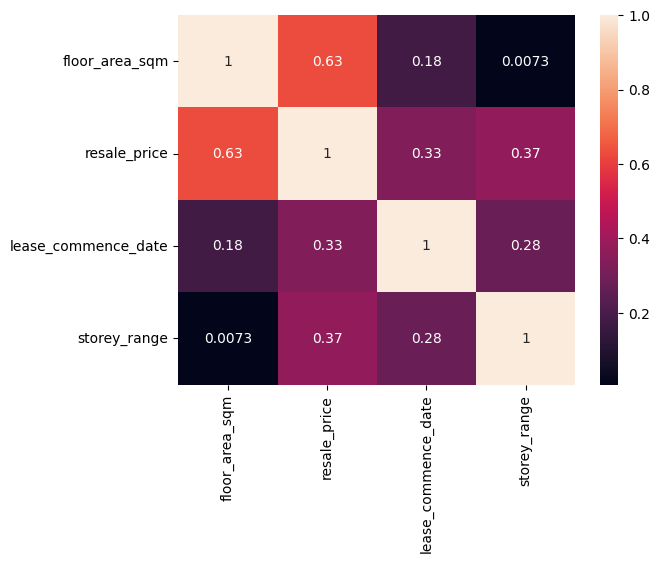

In [ ]:
df_corr.loc[:, 'storey_range'] = le.transform(df['storey_range'])
corrmat = df_corr.corr()

sns.heatmap(corrmat,annot = True)

plt.show()

There are other textual columns that potentially can help with the prediction. We will leave it to you to explore how to improve the prediction performance by leveraging additional features.

## 1.2 Data Preparation

In this section, we will prepare the data for training a linear regression model. In this lab, we will select several columns (a.k.a. features) and assign them to a new dataframe.

We want to use features `floor_area_sqm`, `lease_commence_date` and `storey_range` to predict the target `resale_price`.

Let's create the variables `X` and `y` to represent the features and target, respectively (we use capital `X` to represent a matrix).

Desired cell output:
```
Index(['floor_area_sqm', 'storey_range', 'lease_commence_date'], dtype='object')
Index(['resale_price'], dtype='object')
```

In [ ]:
####  BEGIN GRADED SECTION  ####
#### DO NOT EDIT GIVEN CODE ####
####   FILL IN THE TODOS    ####

import pandas as pd
import seaborn as sns
import numpy as np

import random
random.seed(15)

# Load csv into df
df = # TODO: FILL IN YOUR CODE

# create X and y dataframes that contain the desired features and target, respectively
X = # TODO: FILL IN YOUR CODE
y = # TODO: FILL IN YOUR CODE

# Your output
print(X.columns)
print(y.columns)

Index(['floor_area_sqm', 'storey_range', 'lease_commence_date'], dtype='object')
Index(['resale_price'], dtype='object')


Convert the `storey_range` column into numeric classes

Desired cell output:
```
0    3
1    0
2    0
3    1
4    0
Name: storey_range, dtype: object
```

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
storey_range_unique=X['storey_range'].unique()
mapped = le.fit_transform(storey_range_unique)

mapping = dict(zip(mapped, storey_range_unique))
sorted_dict = dict(sorted(mapping.items()))

X.loc[:, 'storey_range'] = le.transform(X['storey_range'])

# Your output
print(X['storey_range'].head(5))

0    3
1    0
2    0
3    1
4    0
Name: storey_range, dtype: object


Use the `train_test_split` function from sklearn to split the data into training set (70%) and test set (30%).

Desired cell output:
```
(57960, 3) (24841, 3)
```

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 70% for training set and 30% for test set
# Make sure you set random_state=1

X_train, X_test, y_train, y_test = # TODO: FILL IN YOUR CODE

# Your output
print(X_train.shape, X_test.shape)

(57960, 3) (24841, 3)


## 1.3 Training a model

Next, let's train a linear regression model using the processed data.

Desired cell output:
```
Intercept:  [-3105607.7782616]
Coefficient:  [[ 3835.67900772 26418.69159838  1561.29941985]]
```

In [ ]:
from sklearn import linear_model

# Create a linear regression model
reg_model = # TODO: FILL IN YOUR CODE

# Fit the model with the X_train and y_train
# Hint: Use reg_model.fit() function

# TODO: FILL IN YOUR CODE

# Your output
print("Intercept: ", reg_model.intercept_)
print("Coefficient: ", reg_model.coef_)

Intercept:  [-3105607.7782616]
Coefficient:  [[ 3835.67900772 26418.69159838  1561.29941985]]


Let's use the `.predict()` function to test on X_test.

Evaluate the performance of the trained model using mean square error and r2 score.

Desired cell output:
```
Mean Squared Error (MSE): 10560559058.212116
```

Mean Squared Error (MSE): 10560559058.212116


<Axes: xlabel='resale_price'>

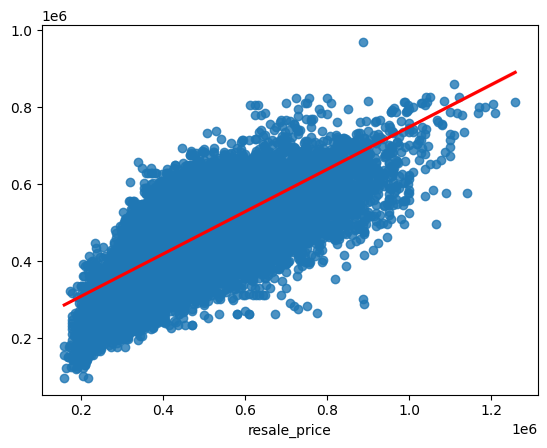

In [ ]:
from sklearn.metrics import mean_squared_error

# use the trained model to predict on test set
y_pred = # TODO: FILL IN YOUR CODE

# Calculate the performance metrics
mse = # TODO: FILL IN YOUR CODE

print(f"Mean Squared Error (MSE): {mse}")

sns.regplot(x= y_test, y=y_pred, line_kws={"color": "red"})

**Interpretation**:

**MSE**: The MSE value is quite high. This indicates that, on average, the squared difference between your model's predictions and the actual target values is substantial. This suggests that there's room for improvement in the model's predictive accuracy.


**Plot**: By visualising the ground truth labels (`y_test`) and the predictions, we can see that the learned equation (red line) fits the labels. However, due to the large variance, in practice, we will need a more complex model than Linear Regression to perform better prediction.